In [4]:
import warnings
warnings.filterwarnings("ignore")

### Loading the Data

In [5]:
import pandas as pd
pd.set_option("display.max_columns",None)

In [6]:
WASTE_GENERATION_df = pd.read_csv("C:/Users/hp/Desktop/Projects/Business-Sustainability-through-Environmental-Impact-Analysis/Data/Waste Generation/municipal waste.csv")
WASTE_GENERATION_df.head()

,region,province,name,tc,cres,csor,istat,area,pop,alt,isle,sea,pden,wden,urb,fee,d_fee,sample,organic,paper,glass,wood,metal,plastic,raee,texile,other,msw_so,msw_un,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
0,Emilia_Romagna,Ferrara,Comacchio,502.250000,129.270004,66.419998,38006,283.750000,22648,1.0,0.0,1.0,79.816742,119671.476562,2.0,PAYT,1,1,NaN,4.363508,3.592508,2.269844,0.462317,1.131815,0.346470,0.112243,3.199499,20396261.0,13560520,33956781,60.07,3.0,285.0,33.105049,15.233530,7.269942,4.354818,9.438692,7.488041
1,Emilia_Romagna,Ferrara,Lagosanto,228.050003,49.520000,44.139999,38011,34.439999,4952,1.0,0.0,1.0,143.786301,70030.984375,3.0,PAYT,1,1,35.040904,9.887817,9.518352,4.001796,1.860965,4.643623,1.608505,0.351429,9.019776,1831407.0,580460,2411867,75.93,3.0,11.0,33.105049,15.233530,7.109984,6.082588,9.510139,7.323284
2,Emilia_Romagna,Ferrara,Goro,268.010010,50.610001,44.599998,38025,26.620001,3895,1.0,0.0,1.0,146.318558,81116.523438,3.0,PAYT,1,1,37.377010,11.991079,6.653014,0.000013,0.744725,5.224834,NaN,0.449308,16.040081,1694922.0,464400,2159322,78.49,3.0,49.0,33.105049,15.233530,7.267856,4.335555,8.891356,7.485891
3,Emilia_Romagna,Ferrara,Mesola,199.089996,41.110001,40.439999,38014,84.300003,7140,1.0,0.0,1.0,84.697502,43320.460938,3.0,PAYT,1,1,45.310474,9.762878,7.551381,0.148580,0.746540,5.202531,NaN,0.400064,9.769176,2881055.0,770860,3651915,78.89,3.0,165.0,33.105049,15.233530,7.085936,3.710479,9.433685,7.298514
4,Puglia,Barletta-Andria-Trani,Margherita di Savoia,233.639999,58.270000,25.950001,110005,35.700001,12193,1.0,0.0,1.0,341.540619,201565.265625,2.0,STANDARD,0,0,0.428440,6.601569,4.334883,2.296731,0.103101,5.120555,0.275157,0.287387,4.052555,3026700.0,4169180,7195880,42.06,1.0,60.0,4.046452,45.411903,7.247444,5.274037,9.125561,7.464867


In [7]:
WASTE_GENERATION_df.isnull().mean()*100

region         0.000000
province       0.000000
name           0.138217
tc             0.000000
cres           1.197881
csor           1.543423
istat          0.000000
area           0.138217
pop            0.000000
alt            0.138217
isle           0.138217
sea            0.138217
pden           0.138217
wden           0.138217
urb            0.138217
fee            0.000000
d_fee          0.000000
sample         0.000000
organic       11.794517
paper          0.575904
glass          0.760194
wood          25.224603
metal          5.666897
plastic        0.898411
raee           7.233356
texile        23.335637
other          3.132919
msw_so         0.000000
msw_un         0.000000
msw            0.000000
sor            0.000000
geo            6.565308
roads         10.205022
s_wteregio     6.565308
s_landfill     6.565308
gdp            8.891960
proads        10.205022
wage           6.565308
finance        8.891960
dtype: float64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ["region","province","name","istat","alt","isle","sea","urb","fee","d_fee","sample","geo","s_wteregio","s_landfill"]


<Axes: >

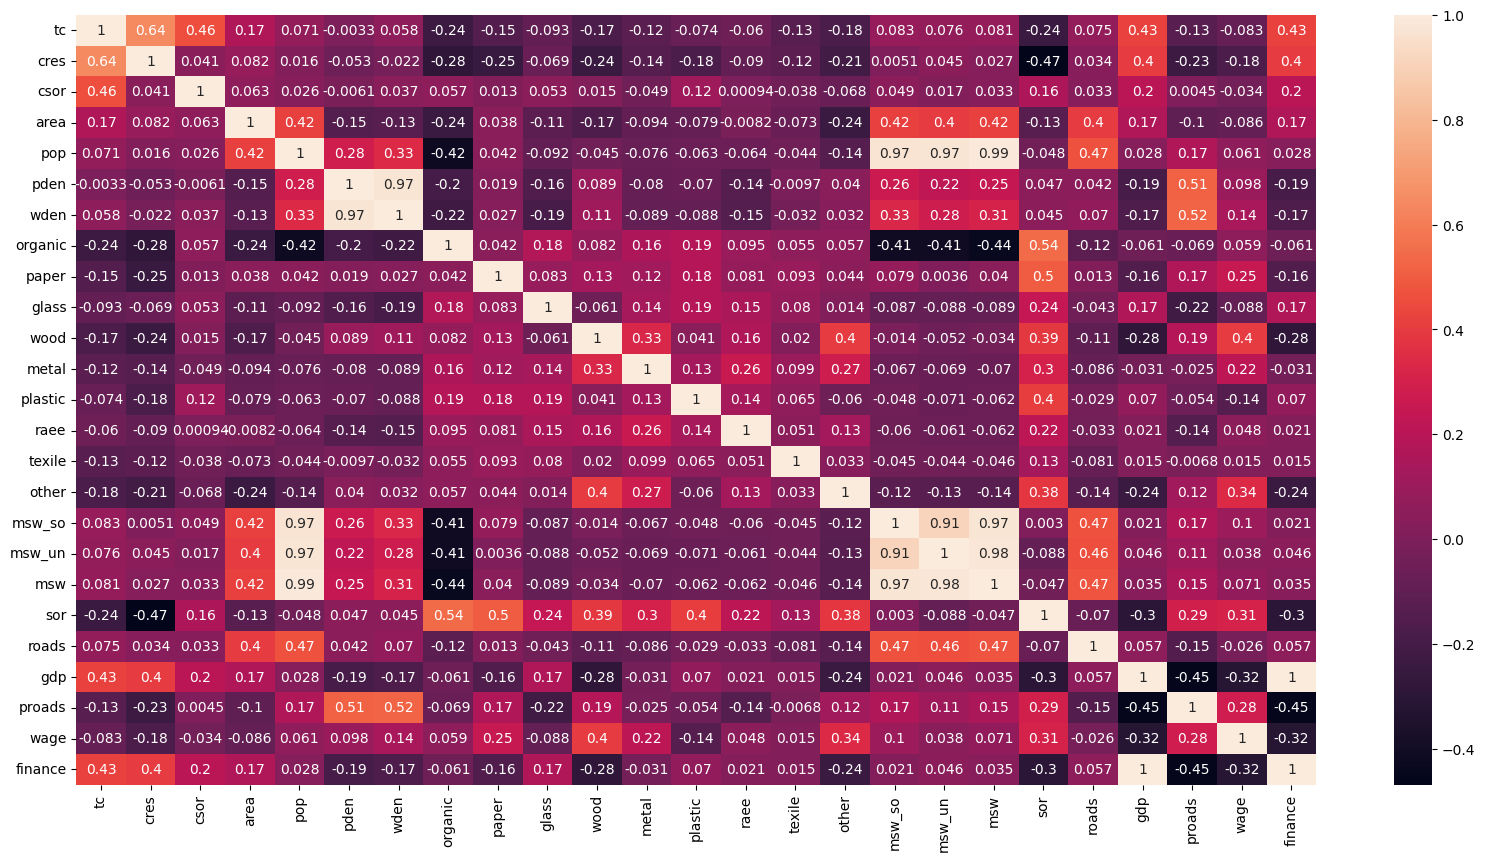

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(WASTE_GENERATION_df.drop(categorical_columns,axis=1).corr(),annot = True)

In [10]:
# wden-pden 

# pop-msw_so,msw_un,msw
# msw_so-msw_un,msw
# msw_un-msw_so,msw

# gdp-finance


<Axes: >

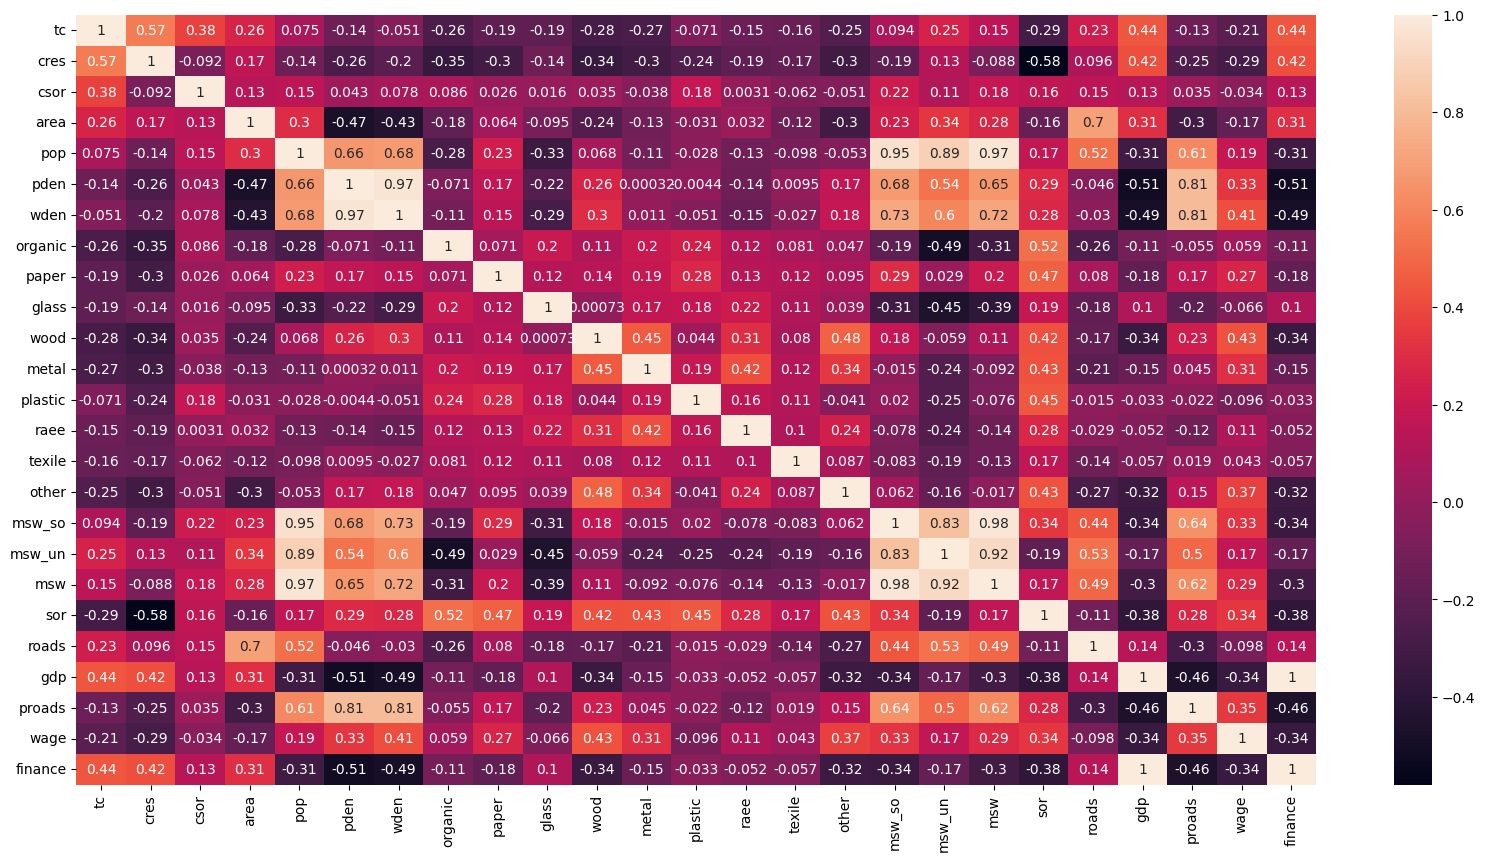

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(WASTE_GENERATION_df.drop(categorical_columns,axis=1).corr(method='spearman'),annot = True)

In [12]:
# proads-pden,wden

In [13]:
# we can remove proads feature can keep either pden or wden
# we can keep pop and remove msw_so,msw_un,msw
# we will remove gdp and keep finance

In [14]:
WASTE_GENERATION_df.drop(['proads','wden','msw_so','msw_un','msw','gdp'],axis=1,inplace=True)
WASTE_GENERATION_df.reset_index(drop=True,inplace=True)

In [15]:
WASTE_GENERATION_df.isnull().mean()*100

region         0.000000
province       0.000000
name           0.138217
tc             0.000000
cres           1.197881
csor           1.543423
istat          0.000000
area           0.138217
pop            0.000000
alt            0.138217
isle           0.138217
sea            0.138217
pden           0.138217
urb            0.138217
fee            0.000000
d_fee          0.000000
sample         0.000000
organic       11.794517
paper          0.575904
glass          0.760194
wood          25.224603
metal          5.666897
plastic        0.898411
raee           7.233356
texile        23.335637
other          3.132919
sor            0.000000
geo            6.565308
roads         10.205022
s_wteregio     6.565308
s_landfill     6.565308
wage           6.565308
finance        8.891960
dtype: float64

In [16]:
null_df = WASTE_GENERATION_df.isnull().mean()*100

for col,nulls in zip(null_df.index,null_df.values):
    
    if nulls<=1.0:
        WASTE_GENERATION_df.dropna(subset=[col],inplace=True)

In [17]:
WASTE_GENERATION_df.isnull().mean()*100

region         0.000000
province       0.000000
name           0.000000
tc             0.000000
cres           1.175917
csor           1.505174
istat          0.000000
area           0.000000
pop            0.000000
alt            0.000000
isle           0.000000
sea            0.000000
pden           0.000000
urb            0.000000
fee            0.000000
d_fee          0.000000
sample         0.000000
organic       11.665099
paper          0.000000
glass          0.000000
wood          24.764817
metal          5.244591
plastic        0.000000
raee           6.937912
texile        23.000941
other          2.939793
sor            0.000000
geo            6.373471
roads         10.042333
s_wteregio     6.373471
s_landfill     6.373471
wage           6.373471
finance        8.748824
dtype: float64

In [18]:
WASTE_GENERATION_df.drop(categorical_columns,axis=1).isnull().mean()*100

tc          0.000000
cres        1.175917
csor        1.505174
area        0.000000
pop         0.000000
pden        0.000000
organic    11.665099
paper       0.000000
glass       0.000000
wood       24.764817
metal       5.244591
plastic     0.000000
raee        6.937912
texile     23.000941
other       2.939793
sor         0.000000
roads      10.042333
wage        6.373471
finance     8.748824
dtype: float64

In [19]:
WASTE_GENERATION_df.shape

(4252, 33)

In [20]:
def random_sample_replacement(dataset,features):
    
    for feature in features:
        
        N_null = dataset[feature].isnull().sum() 
        fill_values = dataset[feature].dropna().sample(N_null).values

        null_indexes = dataset[dataset[feature].isnull()].index.tolist()
        dataset.loc[null_indexes,feature] = fill_values
    
    
null_features_list = WASTE_GENERATION_df.drop(categorical_columns,axis=1).isnull().mean().index
random_sample_replacement(WASTE_GENERATION_df,null_features_list)


In [21]:
WASTE_GENERATION_df.drop(categorical_columns,axis=1).isnull().sum()

tc         0
cres       0
csor       0
area       0
pop        0
pden       0
organic    0
paper      0
glass      0
wood       0
metal      0
plastic    0
raee       0
texile     0
other      0
sor        0
roads      0
wage       0
finance    0
dtype: int64

In [22]:
WASTE_GENERATION_df[categorical_columns].isnull().sum()

region          0
province        0
name            0
istat           0
alt             0
isle            0
sea             0
urb             0
fee             0
d_fee           0
sample          0
geo           271
s_wteregio    271
s_landfill    271
dtype: int64

In [23]:
WASTE_GENERATION_df['geo'].value_counts(dropna=False)

geo
3.0    2323
1.0    1147
2.0     508
NaN     271
1.5       3
Name: count, dtype: int64

In [24]:
WASTE_GENERATION_df['geo'].fillna(-1,inplace=True)
WASTE_GENERATION_df['geo'].value_counts(dropna=False)

geo
 3.0    2323
 1.0    1147
 2.0     508
-1.0     271
 1.5       3
Name: count, dtype: int64

In [25]:
WASTE_GENERATION_df['s_wteregio'].value_counts(dropna=False)

s_wteregio
38.501492    1167
0.000000      618
27.876980     352
33.105049     303
NaN           271
9.898176      256
12.075790     221
17.467550     182
11.051060     154
18.539640     150
5.633980      136
8.904969      110
4.046452      109
24.467649     107
65.122093      63
5.414739       53
Name: count, dtype: int64

In [26]:
WASTE_GENERATION_df['s_wteregio'].fillna(-1,inplace=True)
WASTE_GENERATION_df['s_wteregio'].value_counts(dropna=False)

s_wteregio
 38.501492    1167
 0.000000      618
 27.876980     352
 33.105049     303
-1.000000      271
 9.898176      256
 12.075790     221
 17.467550     182
 11.051060     154
 18.539640     150
 5.633980      136
 8.904969      110
 4.046452      109
 24.467649     107
 65.122093      63
 5.414739       53
Name: count, dtype: int64

In [27]:
WASTE_GENERATION_df['s_landfill'].value_counts(dropna=False)

s_landfill
4.551430     1167
3.602713      352
15.233530     303
NaN           271
11.296785     256
31.493038     221
4.897196      182
76.686035     173
16.863464     171
11.285970     154
11.318043     150
56.751678     136
37.241680     126
39.524139     110
45.411903     109
23.119114     107
42.475330      96
92.531860      63
32.845356      53
48.264023      51
58.461376       1
Name: count, dtype: int64

In [28]:
WASTE_GENERATION_df['s_landfill'].fillna(-1,inplace=True)
WASTE_GENERATION_df['s_landfill'].value_counts(dropna=False)

s_landfill
 4.551430     1167
 3.602713      352
 15.233530     303
-1.000000      271
 11.296785     256
 31.493038     221
 4.897196      182
 76.686035     173
 16.863464     171
 11.285970     154
 11.318043     150
 56.751678     136
 37.241680     126
 39.524139     110
 45.411903     109
 23.119114     107
 42.475330      96
 92.531860      63
 32.845356      53
 48.264023      51
 58.461376       1
Name: count, dtype: int64

In [30]:
WASTE_GENERATION_df[categorical_columns].isnull().sum()

region        0
province      0
name          0
istat         0
alt           0
isle          0
sea           0
urb           0
fee           0
d_fee         0
sample        0
geo           0
s_wteregio    0
s_landfill    0
dtype: int64

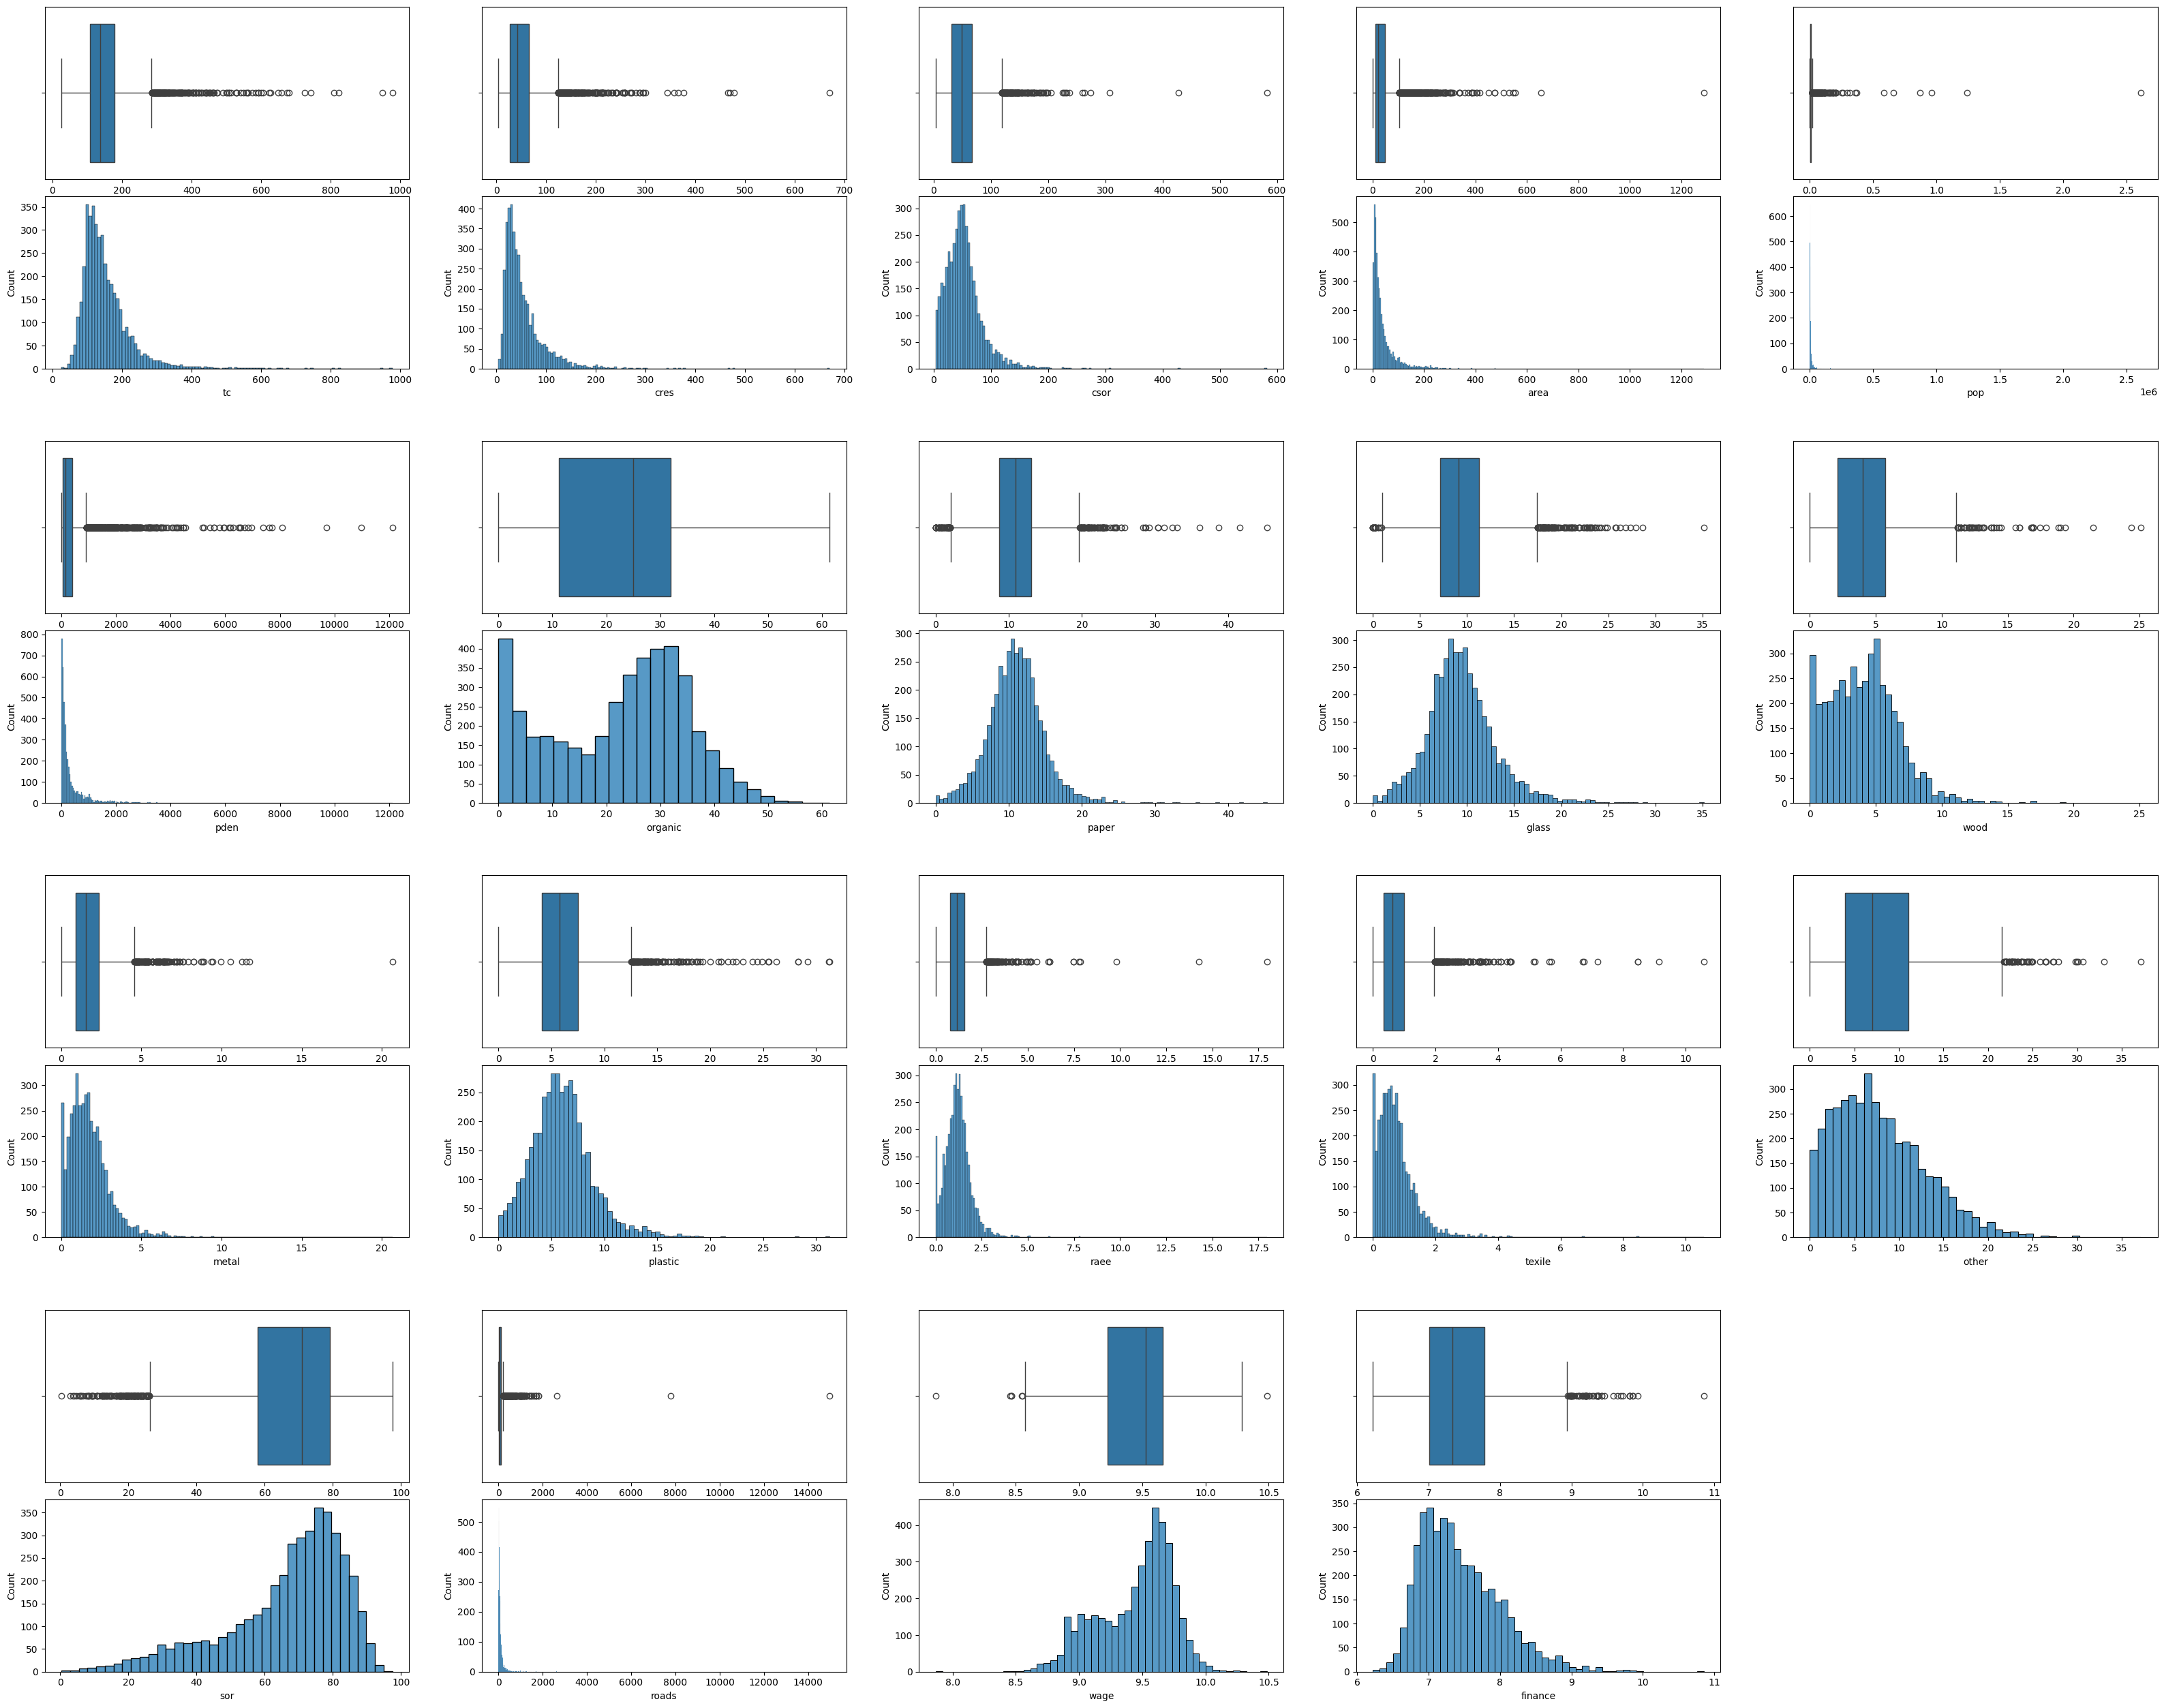

In [56]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(40, 40))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

col_names = WASTE_GENERATION_df.drop(categorical_columns,axis=1).columns

for i,col in enumerate(col_names):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)

    ax = plt.Subplot(fig, inner[0])
    sns.boxplot(ax=ax,x = WASTE_GENERATION_df[col])
    fig.add_subplot(ax)
    
    ax = plt.Subplot(fig, inner[1])
    sns.histplot(ax=ax,x = WASTE_GENERATION_df[col])
    fig.add_subplot(ax)
    